In [8]:
import os
import numpy as np
from tools import analysistools as atools
import pandas as pd
import seaborn as sns
import random

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [25]:
basedir = "/Users/joelforster/Projects/optidb/clus/rebuilds"
budTimes = {}
for f in log_progress(filter(lambda x: 'csv' in x,os.listdir(basedir)),10):
    df = pd.read_csv(os.path.join(basedir,f))
    budTimes[f.split('.')[0]] = -1
    for t in df.timestep.unique():
        if len(filter(lambda x: x>25, df[df.timestep == t].c_cls.value_counts().values)) > 1:
            budTimes[f.split('.')[0]] = t
            break
            
print budTimes

VBox(children=(HTML(value=u''), IntProgress(value=0, max=2881)))

AttributeError: 'DataFrame' object has no attribute 'c_cls'

In [42]:
data = []
for k,v in budTimes.iteritems():
    if k!='coverage':
        data.append((k,int(k.split("_")[1]),v))

In [48]:
buddf = pd.DataFrame(data,columns=['name','ga_budtime','budtime'])

In [49]:
buddf.to_csv('/Users/joelforster/Projects/optidb/clus/budtime.csv')

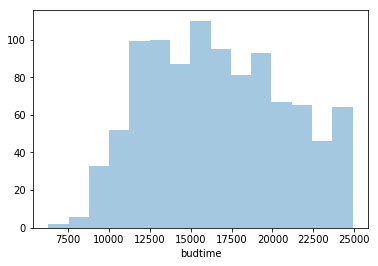

In [54]:
sns.distplot(buddf[buddf.budtime>0]['budtime'],kde=False)

In [57]:
np.mean(buddf[buddf.budtime>0]['budtime'].values)

16658.5